# Fourier transformation
Based on [https://cw.fel.cvut.cz/wiki/courses/b4m33dzo/labs/6_restoration](https://cw.fel.cvut.cz/wiki/courses/b4m33dzo/labs/6_restoration)

Any signal ( e.g. image) can be expressed as a sum of series of sinusoids (sinusoidal variations in brightness across image). Each signal can be represented using: 


1. spatial frequency: the frequency across space (the x-axis in this case) with which the brightness modulates.
2. magnitude (positive or negative): corresponds to contrast, or the difference between the darkest and brightest peaks of the image. A negative magnitude represents a contrast-reversal.
3. phase: represents how the wave is shifted relative to the origin.

If $f(x,y)$ is continuous function with real variables $x$ and $y$, the 2D Fourier transform $F(u,v)$ can be expressed as follows:

$\begin{equation}
F(u, v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \exp[-i 2 \pi (ux + vy)] \, dx \, dy
\end{equation}$

The inverse Fourher transform in 2D:

$\begin{equation}
f(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u,v) \exp[i 2 \pi (ux + vy)] \, du \, dv
\end{equation}$

A Fourier transform encodes a whole series of sinusoids through a range of spatial frequencies from zero (i.e. no modulation, i.e. the average brightness of the whole image) all the way up to the “nyquist frequency”, i.e. the highest spatial frequency that can be encoded in the digital image, which is related to the resolution, or size of the pixels. The Fourier transform encodes all of the spatial frequencies present in an image simultaneously as follows. A signal containing only a single spatial frequency of frequency f is plotted as a single peak at point f along the spatial frequency axis, the height of that peak corresponding to the amplitude, or contrast of that sinusoidal signal.
Image enhancement using Fourier transform



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

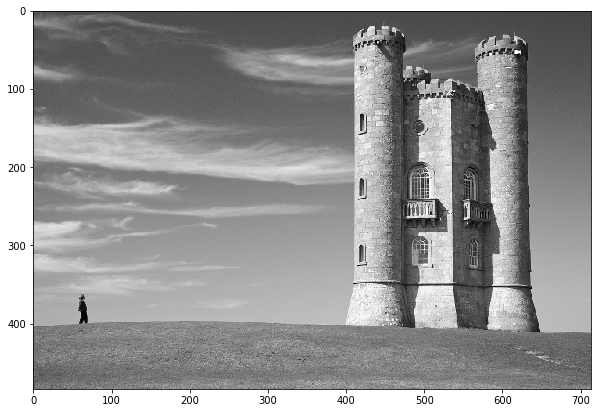

In [2]:
img =  cv2.cvtColor(cv2.imread("data/tower.jpg"), cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize= (10,10))
plt.imshow(img, cmap='gray');

(Text(0.5,1,'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

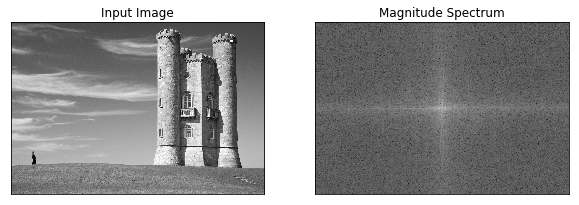

In [3]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig = plt.figure(figsize= (10,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

## High-pass filtr

Highpass filtering sharpens the image by attenuating the low frequencies and leaving the high frequencies of the Fourier transform relatively unchanged. This filter also amplifies noise in the image. It allow high frequency components of image to pass through. Highpass filter can improve image by sharpening details, however, it can also degrade the image quality. 

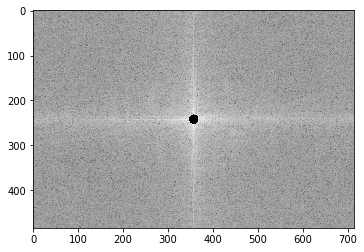

In [4]:
mask_hpf = np.ones(fshift.shape)
center_coordinates = (fshift.shape[1]//2, fshift.shape[0]//2)
radius = 10
color = 0
thickness = -1
mask_hpf = cv2.circle(mask_hpf, center_coordinates, radius, color, thickness)

fft_hpf = copy(fshift)
magnitude_spectrum_hpf = copy(magnitude_spectrum)


fft_hpf[mask_hpf == 0] = 0
magnitude_spectrum_hpf[mask_hpf == 0] = 0
plt.imshow(magnitude_spectrum_hpf, cmap='gray')

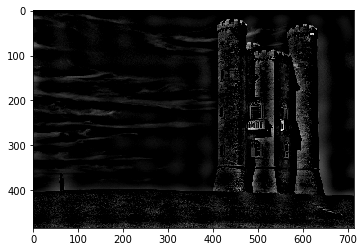

In [5]:
f_ishift_hpf = np.fft.ifftshift(fft_hpf)
img_hpf = np.fft.ifft2(f_ishift_hpf)
img_hpf = np.real(img_hpf)
img_hpf[img_hpf<0] = 0
plt.imshow(img_hpf, cmap='gray')

## Low-pass filtr

Lowpass filters in general smooths out noise in the image.

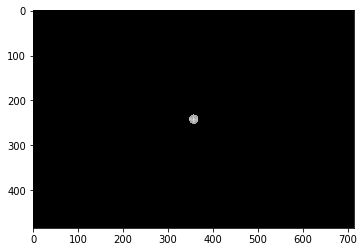

In [6]:
mask_lpf = np.zeros(fshift.shape)
center_coordinates = (fshift.shape[1]//2, fshift.shape[0]//2)
radius = 10
color = 1
thickness = -1
mask_lpf = cv2.circle(mask_lpf, center_coordinates, radius, color, thickness)

fft_lpf = copy(fshift)
magnitude_spectrum_lpf = copy(magnitude_spectrum)

fft_lpf[mask_lpf == 0] = 0
magnitude_spectrum_lpf[mask_lpf == 0] = 0
plt.imshow(magnitude_spectrum_lpf, cmap='gray')

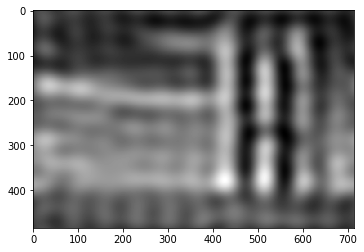

In [7]:
f_ishift_lpf = np.fft.ifftshift(fft_lpf)
img_lpf = np.fft.ifft2(f_ishift_lpf)
img_lpf = np.real(img_lpf)
plt.imshow(img_lpf, cmap='gray')

## FFT and Image restoration - Artifacts removal

The task is to remove artifacts in the image of a cameraman. The Frequency domain clearly shows regular artifacts. The task is to remove (set to zero) those frequencies to restore image. You should find and remove white artifacts in frequency domain. You should use the features of the error (repetition, symmetry). 

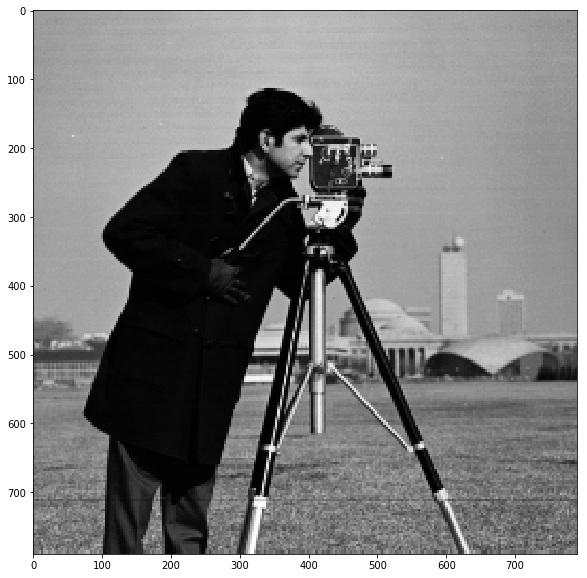

In [8]:
fft_org =  cv2.cvtColor(cv2.imread("data/fft_org.png"), cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize= (10,10))
plt.imshow(fft_org, cmap='gray');

(Text(0.5,1,'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

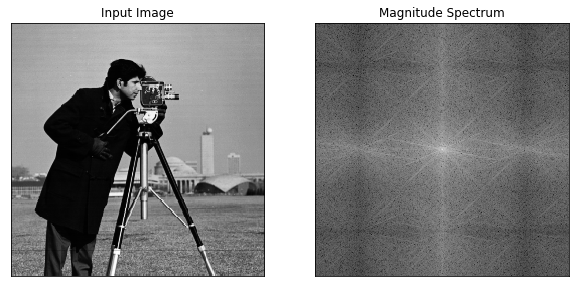

In [9]:
f_org = np.fft.fft2(fft_org)
fshift_org = np.fft.fftshift(f_org)
magnitude_spectrum_org = 20*np.log(np.abs(fshift_org))

fig = plt.figure(figsize= (10,10))
plt.subplot(121),plt.imshow(fft_org, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_org, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

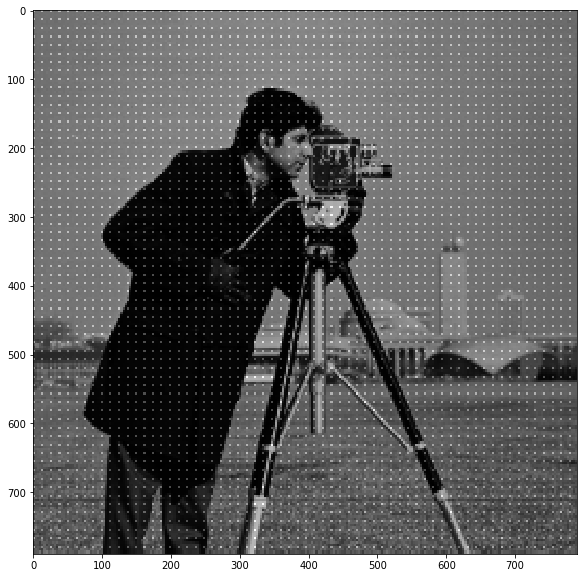

In [10]:
img_2 =  cv2.cvtColor(cv2.imread("data/fft_1.png"), cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize= (10,10))
plt.imshow(img_2, cmap='gray');

(Text(0.5,1,'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

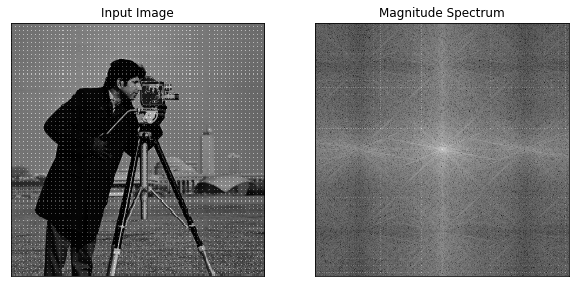

In [11]:
f_2 = np.fft.fft2(img_2)
fshift_2 = np.fft.fftshift(f_2)
magnitude_spectrum_2 = 20*np.log(np.abs(fshift_2))

fig = plt.figure(figsize= (10,10))
plt.subplot(121)
plt.imshow(img_2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum_2, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])